# Classifier for MNIST Hand Written Digits

The list of Scikit-Learn Classifiers: https://stackoverflow.com/questions/41844311/list-of-all-classification-algorithms

In a lot of the Classifier examples, we will be using PARTIAL data simply because training the whole dataset may take a few hours.

(TensorFlow version selector for neural network demonstration for Google Colab)

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


First, let us import the modules we need for loading the dataset and the displaying them!

In [0]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
digits = fetch_openml('mnist_784', version=1)

The MNIST Hand-Written datasets consists of 28x28 images with handwritten digits from 0-9 in black & white. Let's now split this into our data and labels! Each pixel is between 0 and 255, so we should divide the whole image by 255. to scale the numbers down!

In [0]:
X = digits.data
y = digits.target

In [0]:
X /= 255.0

In [6]:
print("Original Shape:", X.shape)
X = X.reshape(70000, 28, 28)
print("New Shape:", X.shape)

Original Shape: (70000, 784)
New Shape: (70000, 28, 28)


Now, let's display a digit and its true value, also known as the label.

The real value is: 5


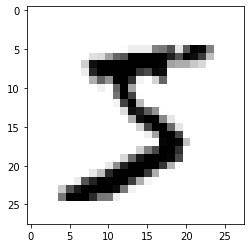

In [7]:
test_num = 0
plt.imshow(X[test_num], cmap='binary')
print("The real value is:", y[test_num])

The next step before we begin training our classifier we need to split this into a training set, a testing set, and a validation set.

Usually, the training set consists of 80% of the whole dataset whereas the testing set is 20% of the whole dataset. The validation set is then 10% of the training set.

We can achieve this result using Scikit-Learn's train_test_split method, extremely easy!

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In order to speed up the convergence and the minimization of the cost function, we should **Normalize** the inputs.

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS18PEfldHdtaRIRY4CVOTw13pbwgzdlECZDcTWiaL41dyGi8HjlA&s)

We could achieve this by simply using Scikit-Learn's StandardScaler method!

Before we normalize our inputs, we need to reshape our 8x8 matrix of pixels into a 64-item array like so:

In [9]:
print("Original Shape:", X_train.shape)
X_train = X_train.reshape((X_train.shape[0], -1))
print("New Shape:", X_train.shape)

Original Shape: (50400, 28, 28)
New Shape: (50400, 784)


We do the same for the test set and the validation set:

In [10]:
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Validation set shape: (5600, 784)
Test set shape: (14000, 784)


In [0]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
X_val_scaled = std_scale.transform(X_val)
X_test_scaled = std_scale.transform(X_test)

That is all for data preprocessing! We are now ready to train different classifiers!

We will begin looking at different classification algorithms now :)

# 1. SVC: Support Vector Classifier from Support Vector Machine

Technically, you would want to train the classifier with all of your training data, but since we have limited time, let's just train on 1000 samples.

In [12]:
from sklearn.svm import SVC

svc = SVC(gamma='auto', random_state=42)
svc.fit(X_train_scaled[:1000], y_train[:1000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

Let's see how our classifier did:

True Value: 0
Predicted Value: ['0']


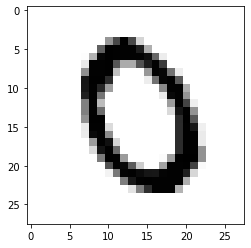

In [13]:
X_pred = svc.predict([X_test_scaled[test_num]])
plt.imshow(X_test[test_num].reshape(28, 28), cmap='binary')
print("True Value:", y_test[test_num])
print("Predicted Value:", X_pred)

True Value: 5
Predicted Value: ['5']


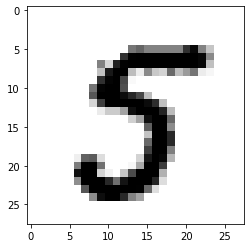

In [14]:
test_num = 173
X_pred = svc.predict([X_test_scaled[test_num]])
plt.imshow(X_test[test_num].reshape(28, 28), cmap='binary')
print("True Value:", y_test[test_num])
print("Predicted Value:", X_pred)

Wowza! These two trials all predicted the image correctly! Let's see how our classifier does with the whole test set by measuring its accuracy:

In [15]:
svc.score(X_test_scaled, y_test)

0.8762142857142857

Not bad at all, not bad at all. We were able to achieve an 88% accuracy with only 1000 samples! Now, let's see how the classifier decides which number to choose from!

In [16]:
svc.decision_function([X_test_scaled[test_num]])

array([[ 4.78694235, -0.28978217,  2.73965772,  8.28947344,  1.73042158,
         9.3014625 ,  0.71778016,  3.76799995,  7.2955197 ,  6.0453005 ]])

As you can see here, the 7th class has the highest "score" out of all 10 classes: 9.26. Thus, the classifier decided to predict this image as the 7th class, which is the number 7.

# 2. K Neighbors Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_clf.fit(X_train_scaled[:1000], y_train[:1000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [18]:
knn_clf.score(X_test_scaled, y_test)

0.8502142857142857

84.8% accuracy, not bad :)

Let's try an example:

True Value: 6
Predicted Value: ['6']


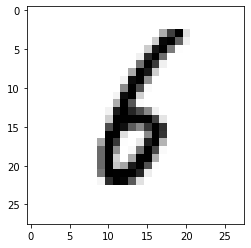

In [19]:
test_num = 256
X_pred = knn_clf.predict([X_test_scaled[test_num]])
plt.imshow(X_test[test_num].reshape(28, 28), cmap='binary')
print("True Value:", y_test[test_num])
print("Predicted Value:", X_pred)

# 3. Decision Tree Classifier

Strong algorithm, but requires a good hyperparameter tuning.

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=20, random_state=42)
tree_clf.fit(X_train_scaled[:20000], y_train[:20000])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [21]:
tree_clf.score(X_test_scaled, y_test)

0.8392142857142857

True Value: 2
Predicted Value: ['2']


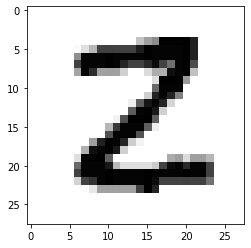

In [22]:
test_num = 7411
X_pred = knn_clf.predict([X_test_scaled[test_num]])
plt.imshow(X_test[test_num].reshape(28, 28), cmap='binary')
print("True Value:", y_test[test_num])
print("Predicted Value:", X_pred)

# 4. TensorFlow Neural Network

Done purely for fun! Don't worry about the number of neurons and layers we choose just yet! I will come back once we reach this topic :)

((Tip: Convolutional Neural Networks in general are much better than Plain Neural Network when assessing images))

In [0]:
import tensorflow as tf
import tensorflow.keras as keras

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9),
              metrics=['accuracy'])

In [26]:
history = model.fit(X_train_scaled, y_train.astype(int), epochs=20,
                    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)],
                    validation_data=(X_val_scaled, y_val.astype(int)))

Train on 50400 samples, validate on 5600 samples
Epoch 1/20
50400/50400 [==============================] - 8s 166us/sample - loss: 0.4807 - accuracy: 0.8644 - val_loss: 0.2554 - val_accuracy: 0.9302
Epoch 2/20
50400/50400 [==============================] - 8s 154us/sample - loss: 0.1843 - accuracy: 0.9456 - val_loss: 0.1836 - val_accuracy: 0.9475
Epoch 3/20
50400/50400 [==============================] - 8s 153us/sample - loss: 0.1291 - accuracy: 0.9614 - val_loss: 0.1553 - val_accuracy: 0.9543
Epoch 4/20
50400/50400 [==============================] - 8s 152us/sample - loss: 0.0987 - accuracy: 0.9715 - val_loss: 0.1454 - val_accuracy: 0.9582
Epoch 5/20
50400/50400 [==============================] - 8s 152us/sample - loss: 0.0775 - accuracy: 0.9777 - val_loss: 0.1389 - val_accuracy: 0.9618
Epoch 6/20
50400/50400 [==============================] - 8s 151us/sample - loss: 0.0637 - accuracy: 0.9821 - val_loss: 0.1331 - val_accuracy: 0.9648
Epoch 7/20
50400/50400 [===========================

In [27]:
model.evaluate(X_test_scaled, y_test.astype(int))

14000/14000 [==============================] - 1s 66us/sample - loss: 0.2391 - accuracy: 0.9676


[0.23912783591289605, 0.96764284]

**W O W**! With a neural network, we can quickly increase our accuracy up to a solid 96%! This is crazy!

# Cross Validation

Cross validation is used to reduce overfitting. Overfitting happens when the model learns the "training data" too well, causing the testing data evaluation to fail. One way to find out whether we are overfitting is by creating a separate cohort of data called the "validation data."

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svc, X_train_scaled[:1500], y_train[:1500], cv=3, scoring="accuracy")

In [29]:
print("Scores: ", scores)

Scores:  [0.90079365 0.87975952 0.89336016]


Since the cross validation scores are all above 88%, we can be certain that the model did not overfit the data and is pretty consistent :)

### This concludes our topic on classification! Hope you enjoyed! As always, for any questions, contact us through foothill.mlds@gmail.com :D